# Load Dependencies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Data

In [2]:
features = pd.read_csv('../input/Features data set.csv')
sales = pd.read_csv('../input/sales data-set.csv')
stores = pd.read_csv('../input/stores data-set.csv')

# Glimpse of Data

Let's first see a glimpse of features data

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Now let's see sales data

In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In last stores data

In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


**Data Description**

From features data:
* Store - Numeric store ID for each store
* Date - Important dates for store
* Fuel price - Current fuel prices
* Markdowns - Markdowns are the discount you take on merchandise in your retail store from the original sale price marked. 
* CPI - The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food and medical care.
* Unemployment - Current unemployment rate 
* IsHoliday - Wether it's holiday or not on particular date

From sales data:
* Store - Numeric store ID for each store
* Dept - Numeric department ID for each department of store
* Date - Important dates for store
* Weekly Sales - Weekly sales to meassure sales performance of each store 
* IsHoliday - Is it holiday or not on particular date

From store data:
* Store - Numeric store ID for each store
* Type - Type of store
* Size - Size of store

**Total Rows & Columns in Each Data**


In [6]:
print(f"Total rows & columns in Features Data: {features.shape}")
print(f"Total rows & columns in Sales Data: {sales.shape}")
print(f"Total rows & columns in Stores Data: {stores.shape}")

Total rows & columns in Features Data: (8190, 12)
Total rows & columns in Sales Data: (421570, 5)
Total rows & columns in Stores Data: (45, 3)


Let's join the data & form one data frame

In [7]:
df = pd.merge(pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday']), stores, on=['Store'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


Let's convert IsHoliday to better numerical form than boolean

In [8]:
df['IsHoliday'] = df['IsHoliday'].apply(lambda x: 1 if x== True else 0)
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,32229.38,A,151315


Let's convert Date to pandas Date formate

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,1,24924.50,A,151315
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,2,50605.27,A,151315
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,3,13740.12,A,151315
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,4,39954.04,A,151315
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,5,32229.38,A,151315


**Total Rows & Columns in final data**

In [10]:
print(f"Total rows & columns in Final Data: {df.shape}")

Total rows & columns in Final Data: (421570, 16)


# Visualizations

Let's first visualize distribution of our data

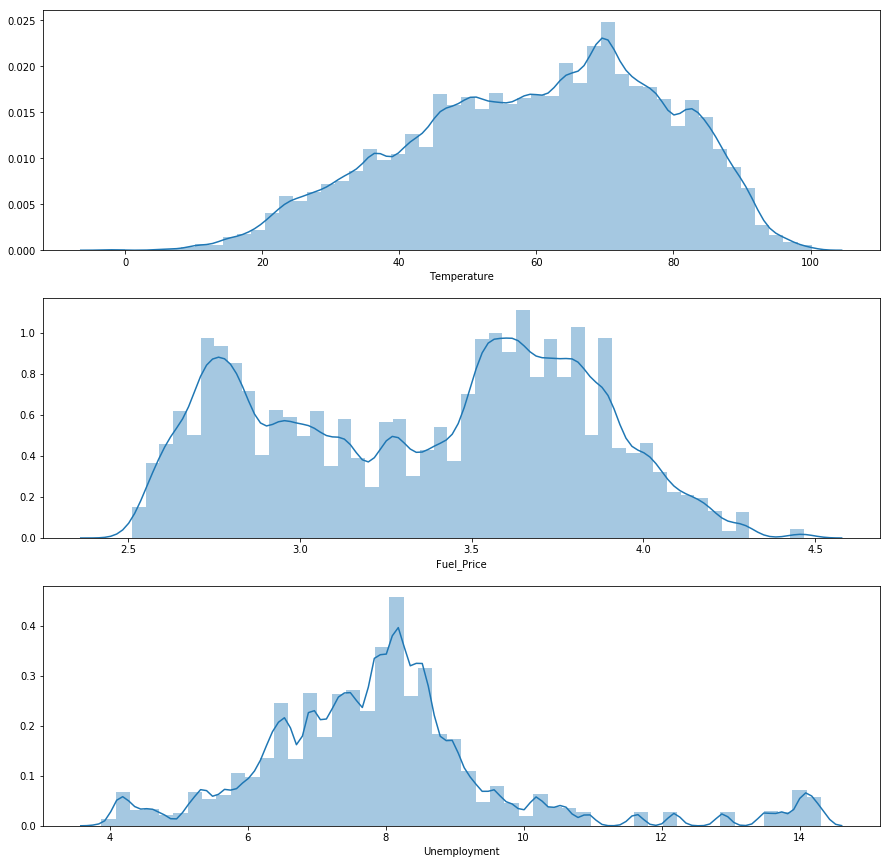

In [11]:
f, ax = plt.subplots(3, figsize=(15,15))
sns.distplot(df.Temperature, ax=ax[0])
sns.distplot(df.Fuel_Price, ax=ax[1])
sns.distplot(df.Unemployment, ax=ax[2])

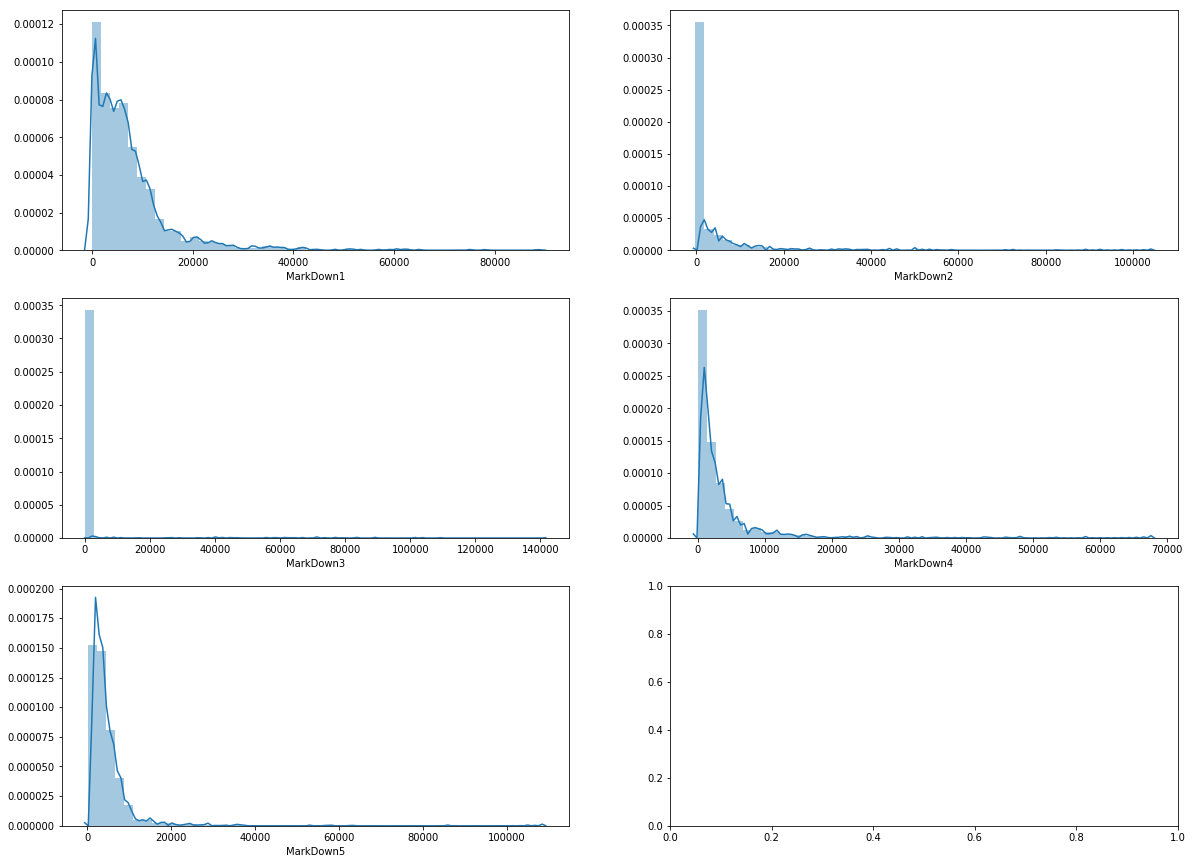

In [12]:

f, ax = plt.subplots(3,2, figsize=(20,15))
sns.distplot(df.MarkDown1.dropna(), ax=ax[0,0])
sns.distplot(df.MarkDown2.dropna(), ax=ax[0,1])
sns.distplot(df.MarkDown3.dropna(), ax=ax[1,0])
sns.distplot(df.MarkDown4.dropna(), ax=ax[1,1])
sns.distplot(df.MarkDown5.dropna(), ax=ax[2,0])

Looks, Intresting! 

**Relation between numerical data**

Let's try with CPI & MarkDowns

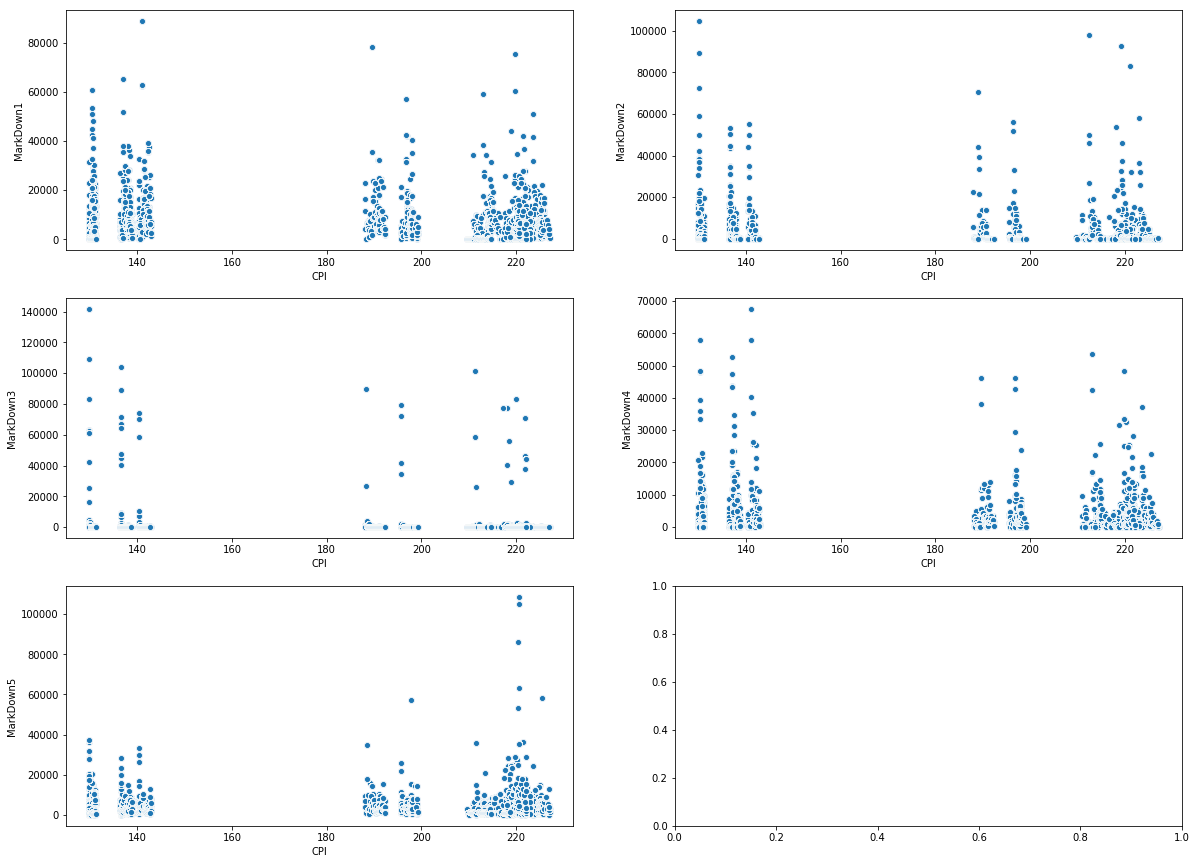

In [13]:
f, ax = plt.subplots(3,2, figsize=(20,15))
sns.scatterplot(x="CPI", y="MarkDown1", data=df, ax=ax[0,0])
sns.scatterplot(x="CPI", y="MarkDown2", data=df, ax=ax[0,1])
sns.scatterplot(x="CPI", y="MarkDown3", data=df, ax=ax[1,0])
sns.scatterplot(x="CPI", y="MarkDown4", data=df, ax=ax[1,1])
sns.scatterplot(x="CPI", y="MarkDown5", data=df, ax=ax[2,0])

**Observations**
* Something not good happens with MarkDown3, the huge count of CPI decreases 

Let's try to find what actually happened?

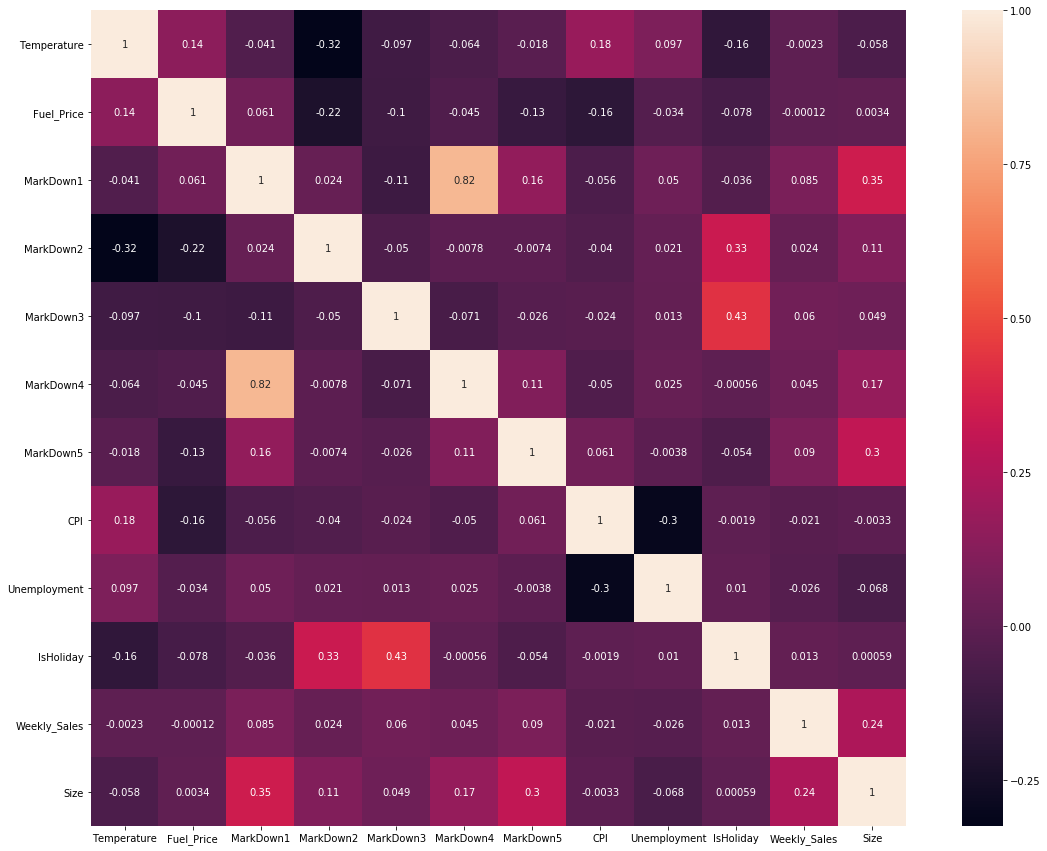

In [14]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.drop(['Store', 'Dept'], axis=1).corr(), square=True, annot=True)

**Insights**
* MarkDown3 have very much dependency on Holiday. It seems to be decrease is due to not holiday on MarkDown3 days.
* MarkDown1 have very strong relation with MarkDown4
* MarkDown2 is less dependent on Holiday than MardkDown3
* MarkDown4 looks same relation as MarkDown1 have with MarkDown4
* MarkDown5 looks more dependent on size of store than MarkDown1
* Weekly Sales are dependent on size of store more than other factors

**Best performing stores (Top 10) **

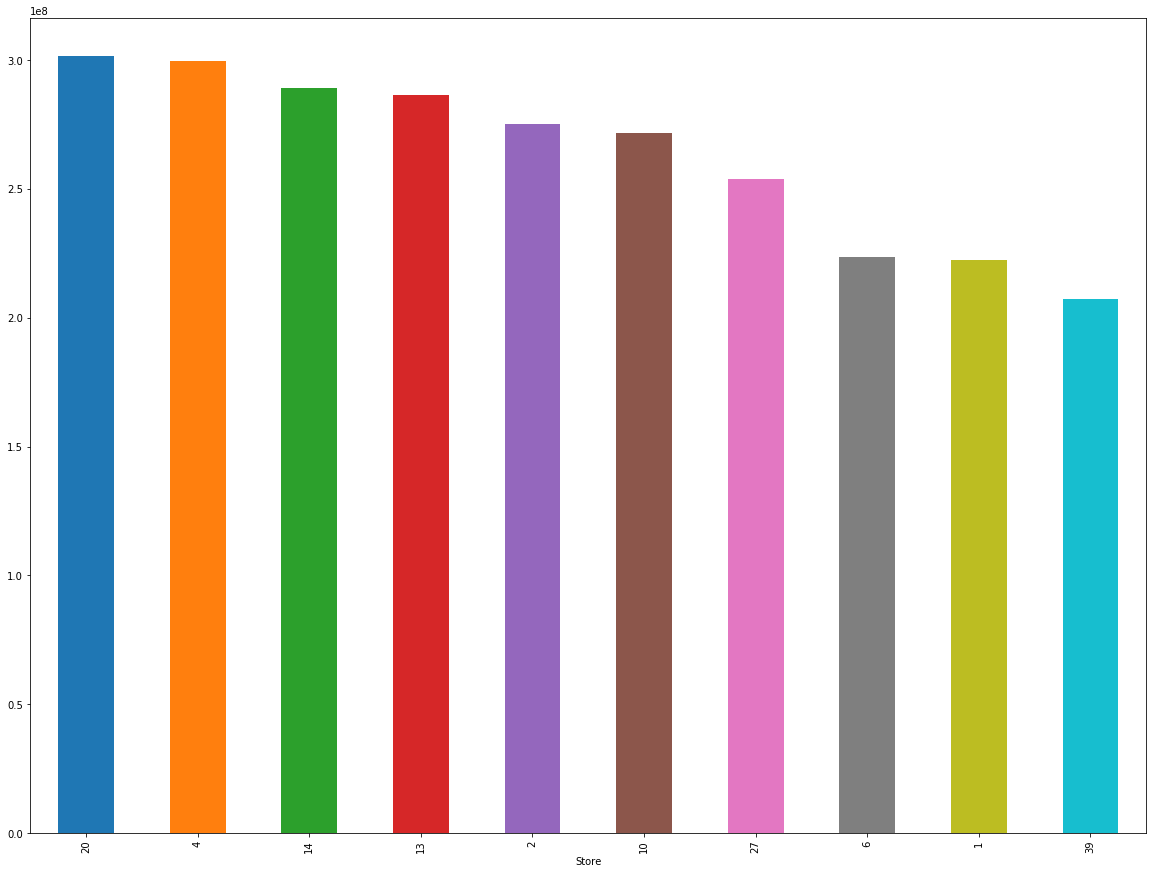

In [15]:
top_10_stores = df.groupby(['Store'])['Weekly_Sales'].sum()
top_10_stores.sort_values(ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(20,15))
top_10_stores[:10].plot.bar()

**Observations**
* Store20 looks have the most weekly sales. Why?

Let's findout!


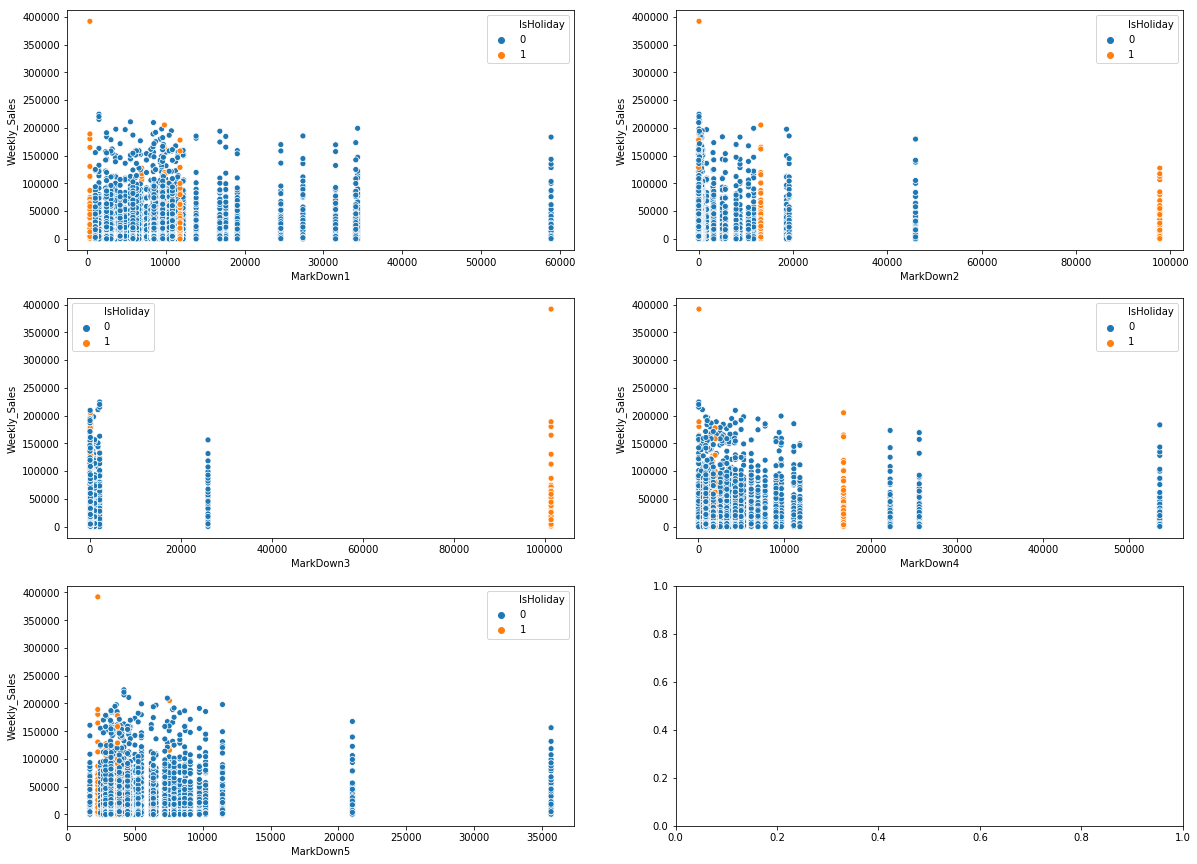

In [16]:
store_20_data = df.loc[df['Store']==20]
f, ax = plt.subplots(3,2, figsize=(20,15))
sns.scatterplot(x="MarkDown1", y="Weekly_Sales", hue='IsHoliday', data=store_20_data, ax=ax[0,0])
sns.scatterplot(x="MarkDown2", y="Weekly_Sales", hue='IsHoliday', data=store_20_data, ax=ax[0,1])
sns.scatterplot(x="MarkDown3", y="Weekly_Sales", hue='IsHoliday', data=store_20_data, ax=ax[1,0])
sns.scatterplot(x="MarkDown4", y="Weekly_Sales", hue='IsHoliday', data=store_20_data, ax=ax[1,1])
sns.scatterplot(x="MarkDown5", y="Weekly_Sales", hue='IsHoliday', data=store_20_data, ax=ax[2,0])

**Insights**
* It looks like with each MarkDown between 0-10,000 their sale got boost on holiday

**Least performing stores (Least 10)**

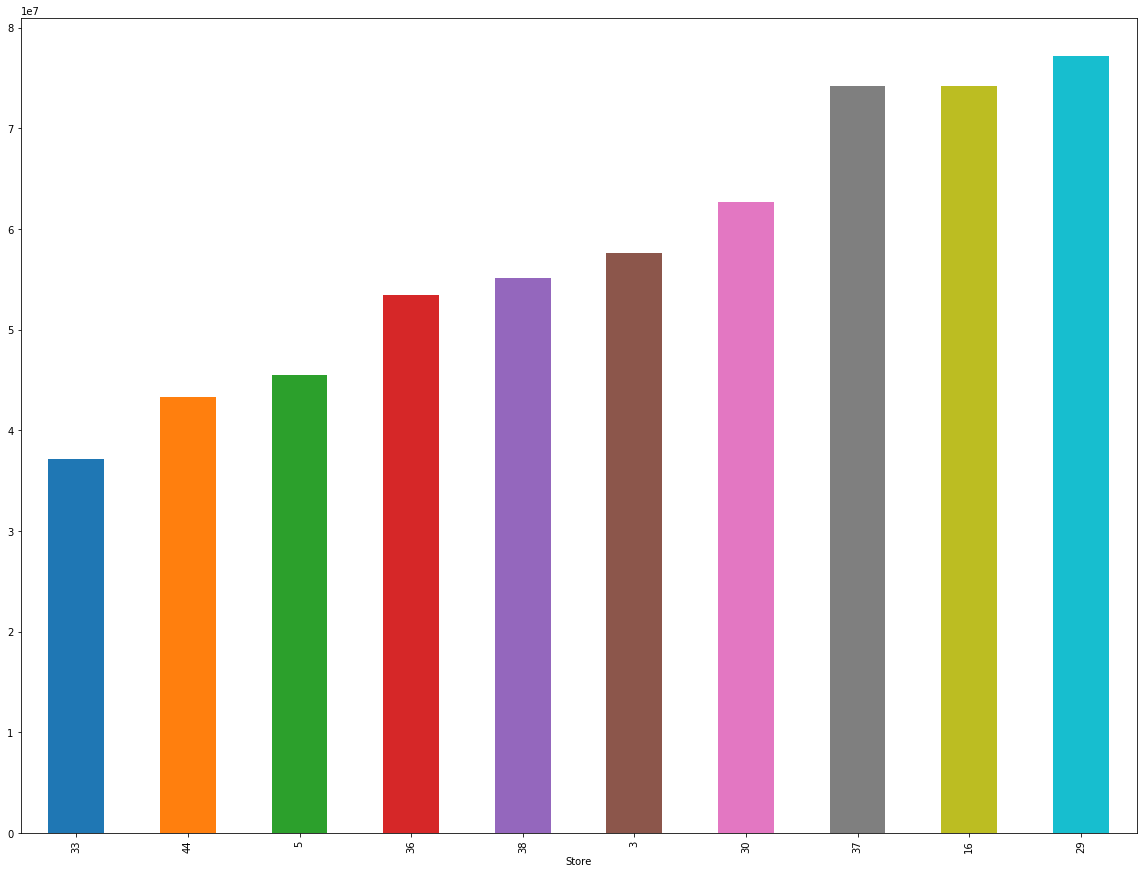

In [17]:
least_10_stores = df.groupby(['Store'])['Weekly_Sales'].sum()
least_10_stores.sort_values(ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(20,15))
least_10_stores[:10].plot.bar()

**Observations**
* Store33 looks have the least weekly sales. Why?

Let's findout!


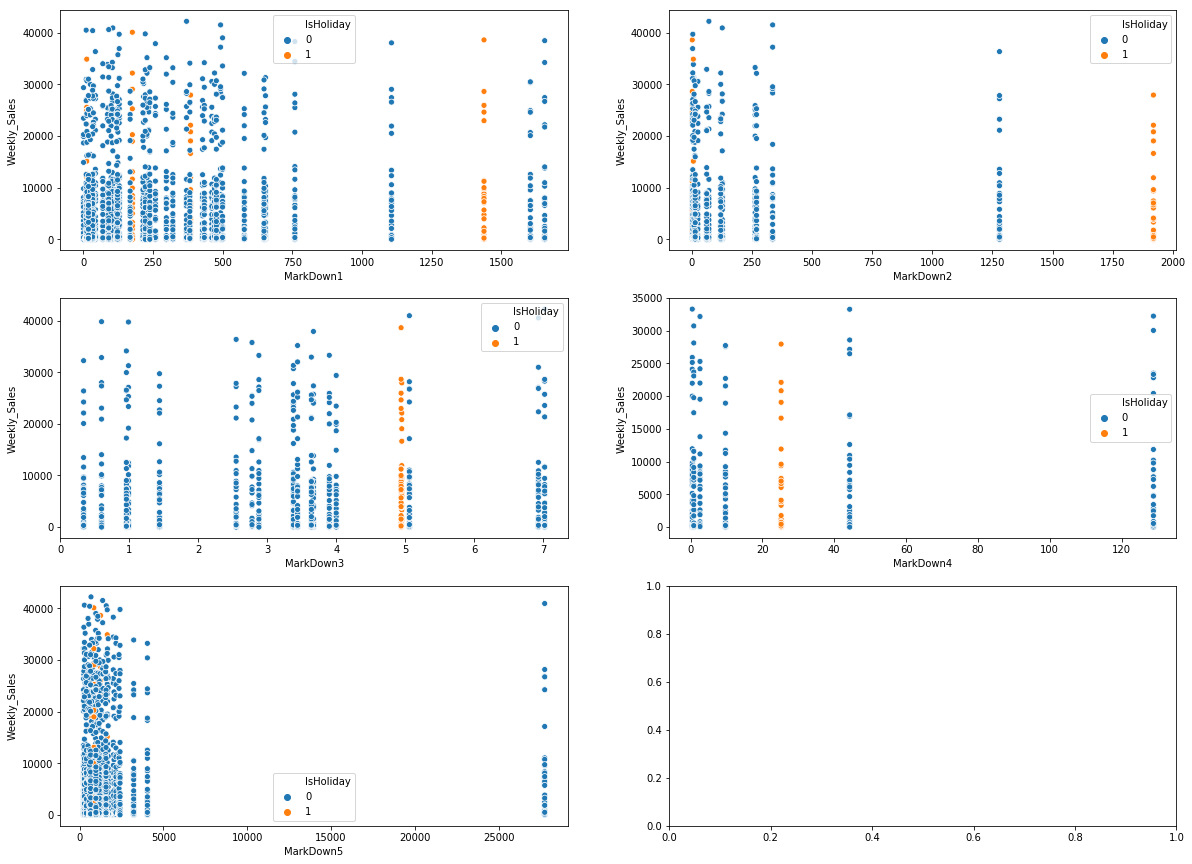

In [18]:
store_33_data = df.loc[df['Store']==33]
f, ax = plt.subplots(3,2, figsize=(20,15))
sns.scatterplot(x="MarkDown1", y="Weekly_Sales", hue='IsHoliday', data=store_33_data, ax=ax[0,0])
sns.scatterplot(x="MarkDown2", y="Weekly_Sales", hue='IsHoliday', data=store_33_data, ax=ax[0,1])
sns.scatterplot(x="MarkDown3", y="Weekly_Sales", hue='IsHoliday', data=store_33_data, ax=ax[1,0])
sns.scatterplot(x="MarkDown4", y="Weekly_Sales", hue='IsHoliday', data=store_33_data, ax=ax[1,1])
sns.scatterplot(x="MarkDown5", y="Weekly_Sales", hue='IsHoliday', data=store_33_data, ax=ax[2,0])

**Insights**
* It looks like their each MarkDown stays under 100 and their sale decreases.

**Yearly Sales**

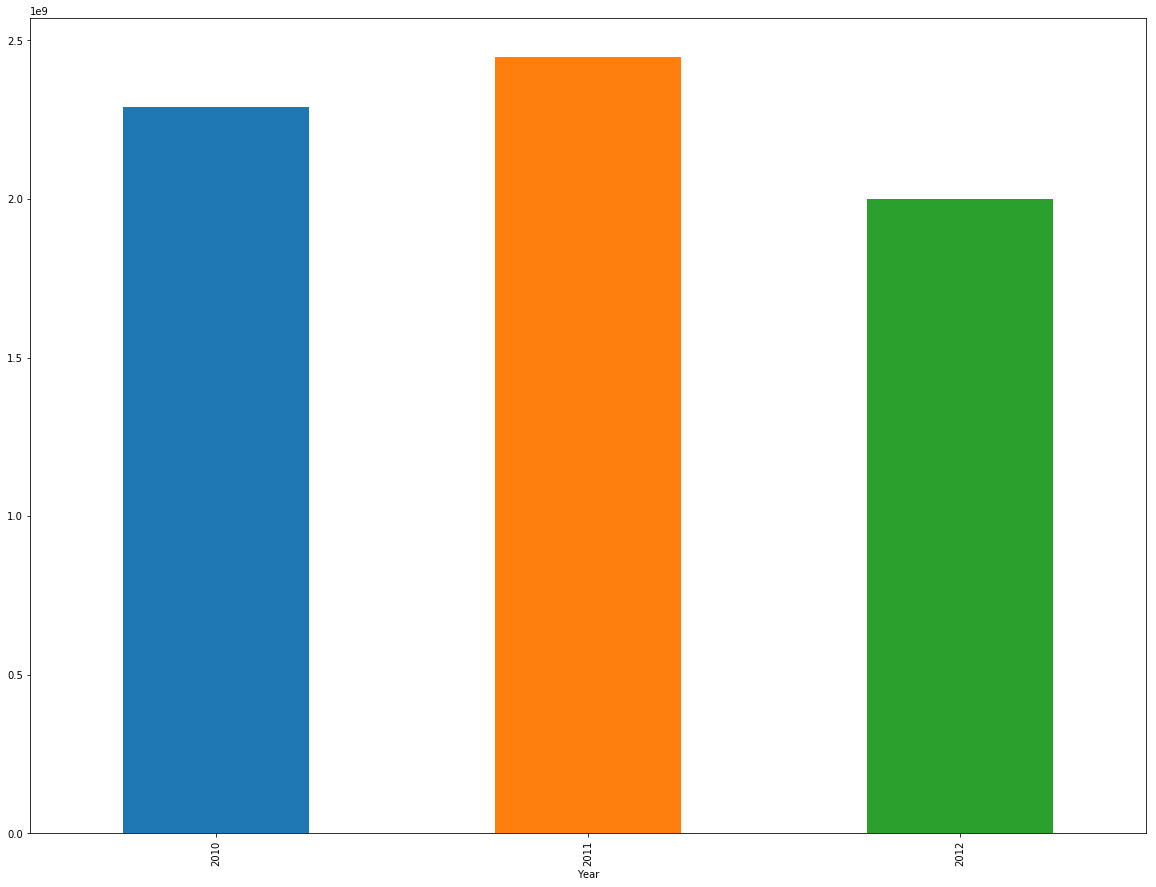

In [19]:
df['Year'] = df.Date.dt.year
yearly_data = df.groupby(['Year'])['Weekly_Sales'].sum()
plt.figure(figsize=(20,15))
yearly_data.plot.bar()

**Insights**
* A significant drop in sales after 2011
* Maximum sales in 2011

Let's find out why 2011 got most sales than other years

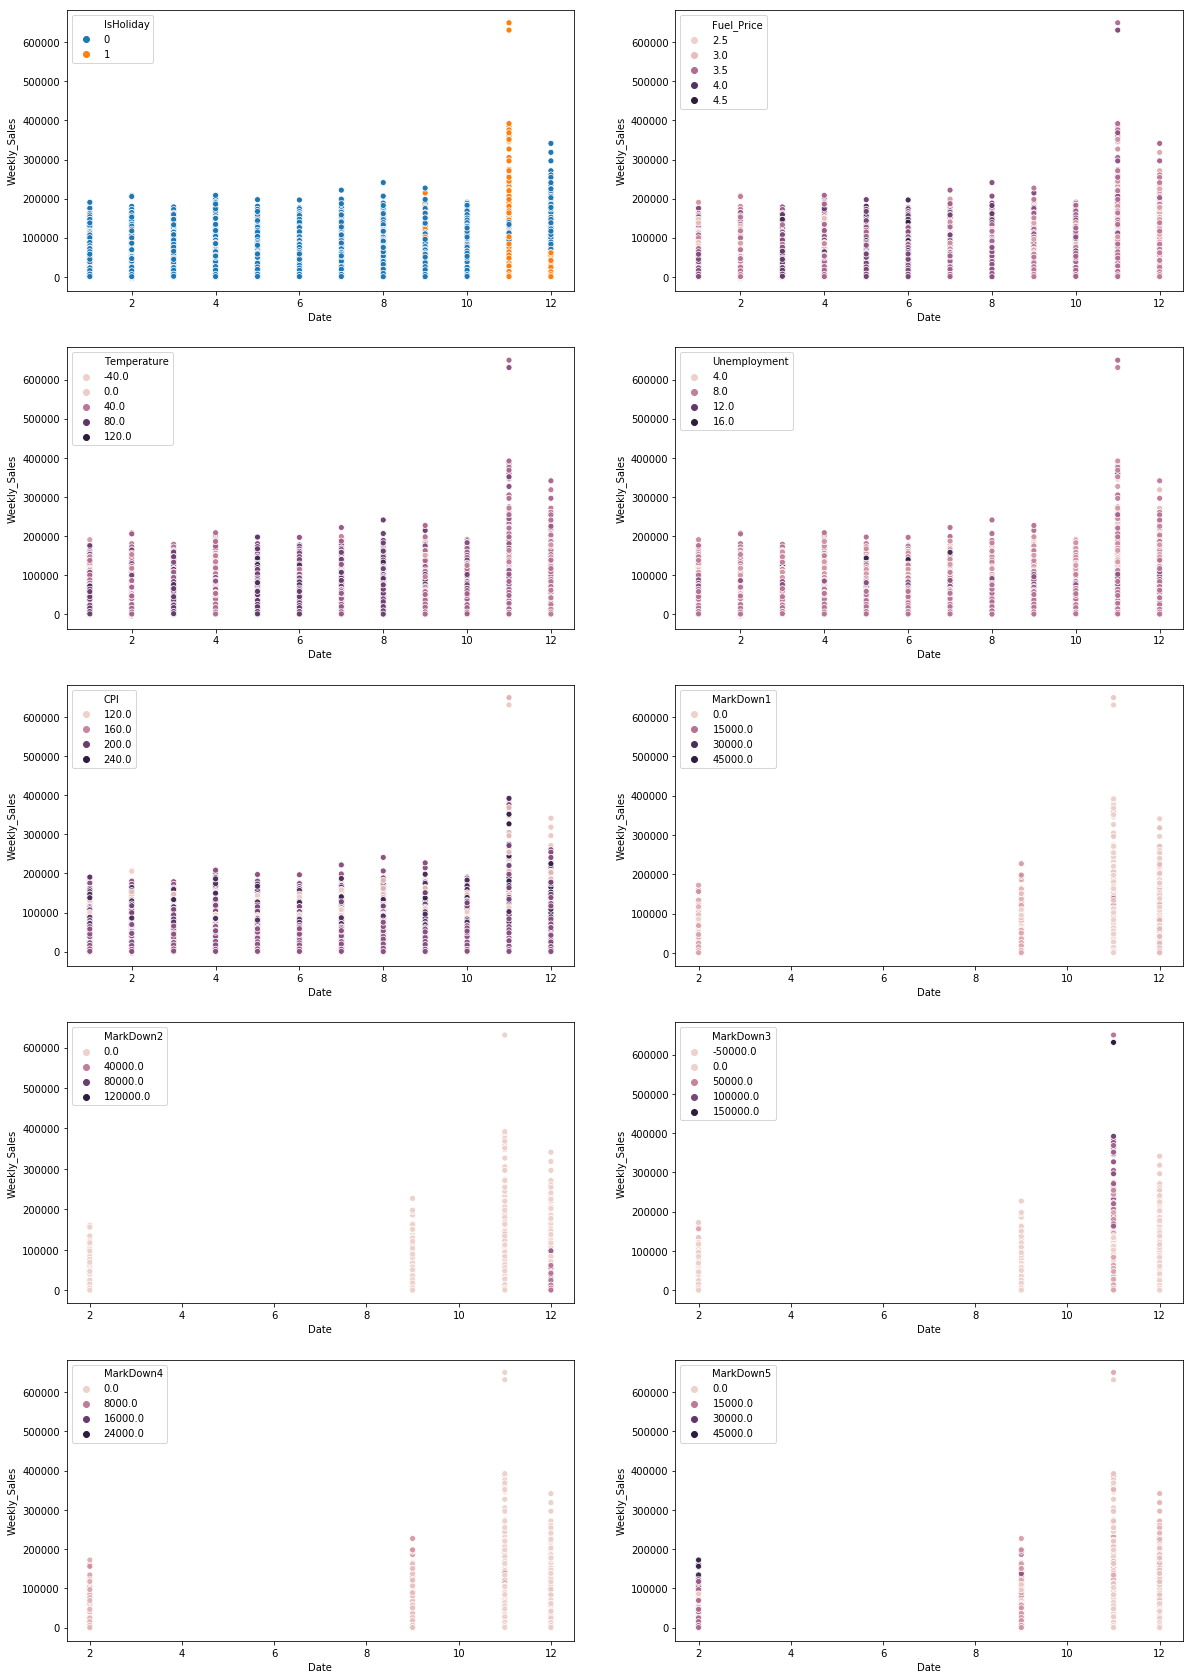

In [20]:
year_2011_data = df.loc[df.Year==2011]
f, ax = plt.subplots(5,2, figsize=(20,30))
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='IsHoliday', data=year_2011_data, ax=ax[0,0])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='Fuel_Price', data=year_2011_data, ax=ax[0,1])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='Temperature', data=year_2011_data, ax=ax[1,0])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='Unemployment', data=year_2011_data, ax=ax[1,1])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='CPI', data=year_2011_data, ax=ax[2,0])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='MarkDown1', data=year_2011_data, ax=ax[2,1])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='MarkDown2', data=year_2011_data, ax=ax[3,0])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='MarkDown3', data=year_2011_data, ax=ax[3,1])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='MarkDown4', data=year_2011_data, ax=ax[4,0])
sns.scatterplot(x=year_2011_data.Date.dt.month, y="Weekly_Sales", hue='MarkDown5', data=year_2011_data, ax=ax[4,1])

**Insights**

At the time of Sales boost there was following factors which boosted their sales:
* There was holiday on those days
*  Fuel prices were average
* Temperature was average
* Unemployment was low
*  No MarkDown1, MarkDown2, MarkDown4, MarkDown5
* Yes there was MarkDown3
All out insights very similar to the one we extracted before. It's MarkDown3 that's helping stores to boost their sales specially on holidays.

**Department performance**

Let's try to find out which top 10 departments are most performing

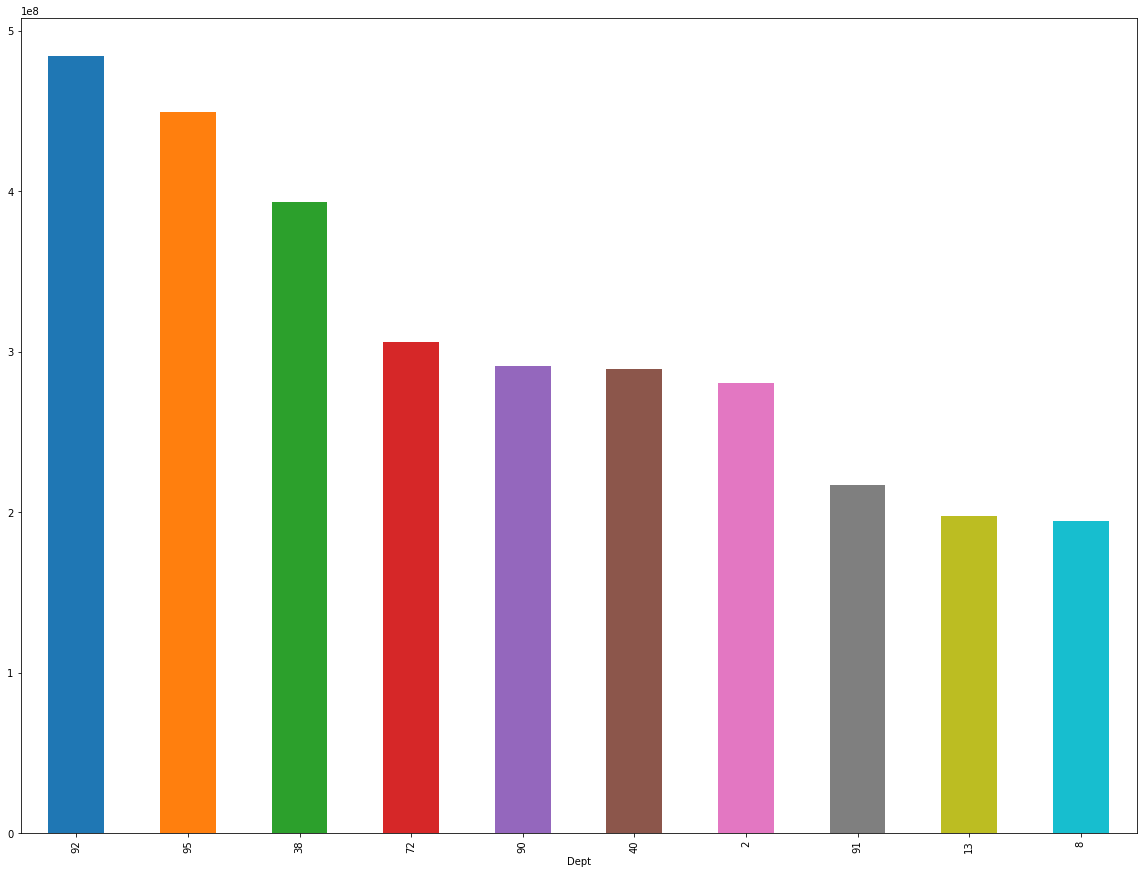

In [21]:
top_department_data = df.groupby(['Dept'])['Weekly_Sales'].sum()
top_department_data.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(20,15))
top_department_data[:10].plot.bar()

**Observations**
* Department 92 looks the most performing

Let's find out why

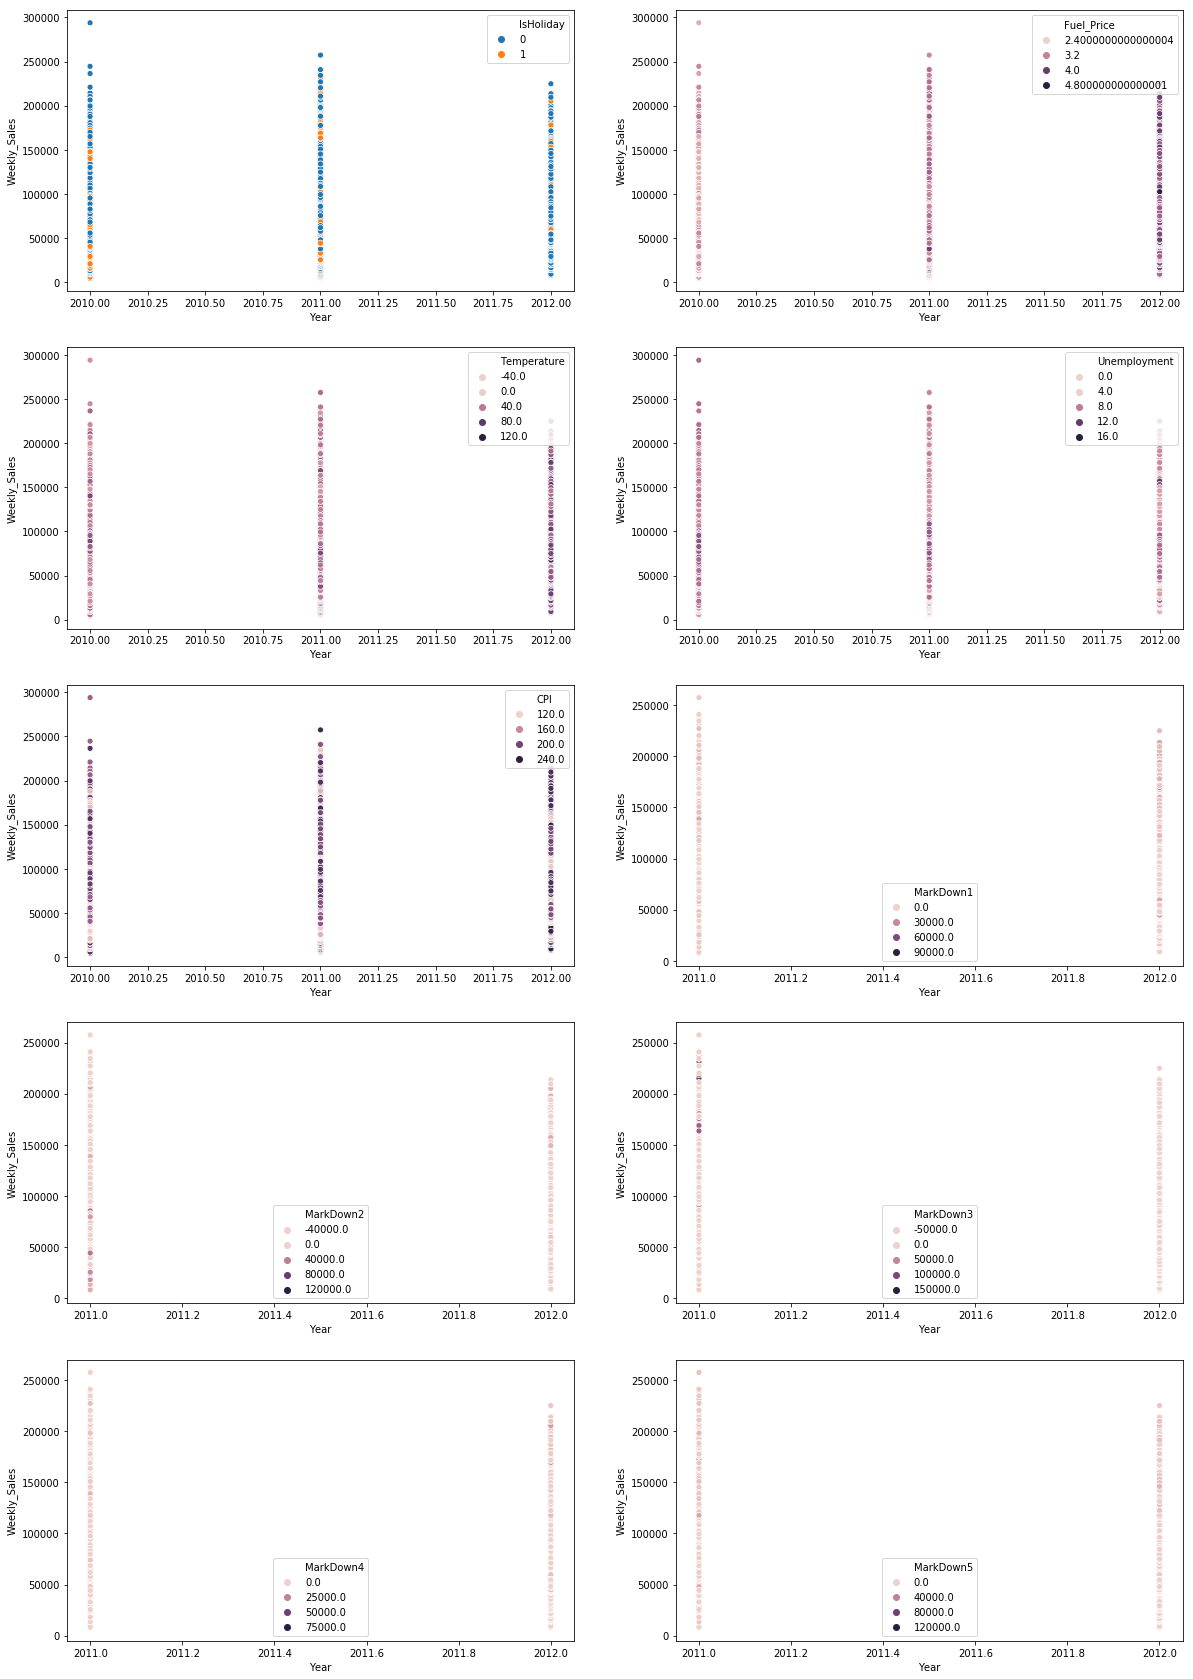

In [25]:
department_92_data = df.loc[df.Dept==92]
f, ax = plt.subplots(5,2, figsize=(20,30))
sns.scatterplot(x='Year', y="Weekly_Sales", hue='IsHoliday', data=department_92_data, ax=ax[0,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='Fuel_Price', data=department_92_data, ax=ax[0,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='Temperature', data=department_92_data, ax=ax[1,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='Unemployment', data=department_92_data, ax=ax[1,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='CPI', data=department_92_data, ax=ax[2,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown1', data=department_92_data, ax=ax[2,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown2', data=department_92_data, ax=ax[3,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown3', data=department_92_data, ax=ax[3,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown4', data=department_92_data, ax=ax[4,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown5', data=department_92_data, ax=ax[4,1])

**Insights**
At the time of Sales boost there was following factors which boosted their sales:

* CPI is much higher

All our insights very similar to the one we extracted before. It's CPI specially that's helping them to boos their sales also all the MarkDowns are same till some extend.

**Performance by Type**

<Figure size 1440x1080 with 0 Axes>

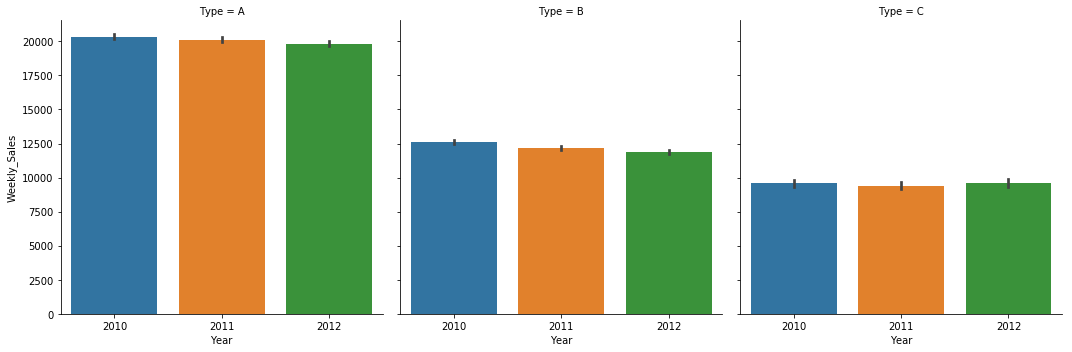

In [27]:
plt.figure(figsize=(20,15))
sns.catplot(x='Year', y="Weekly_Sales", col="Type", data=df, kind="bar")

**Observations**
* Type A looks the most performing in 2010

Let's find out why

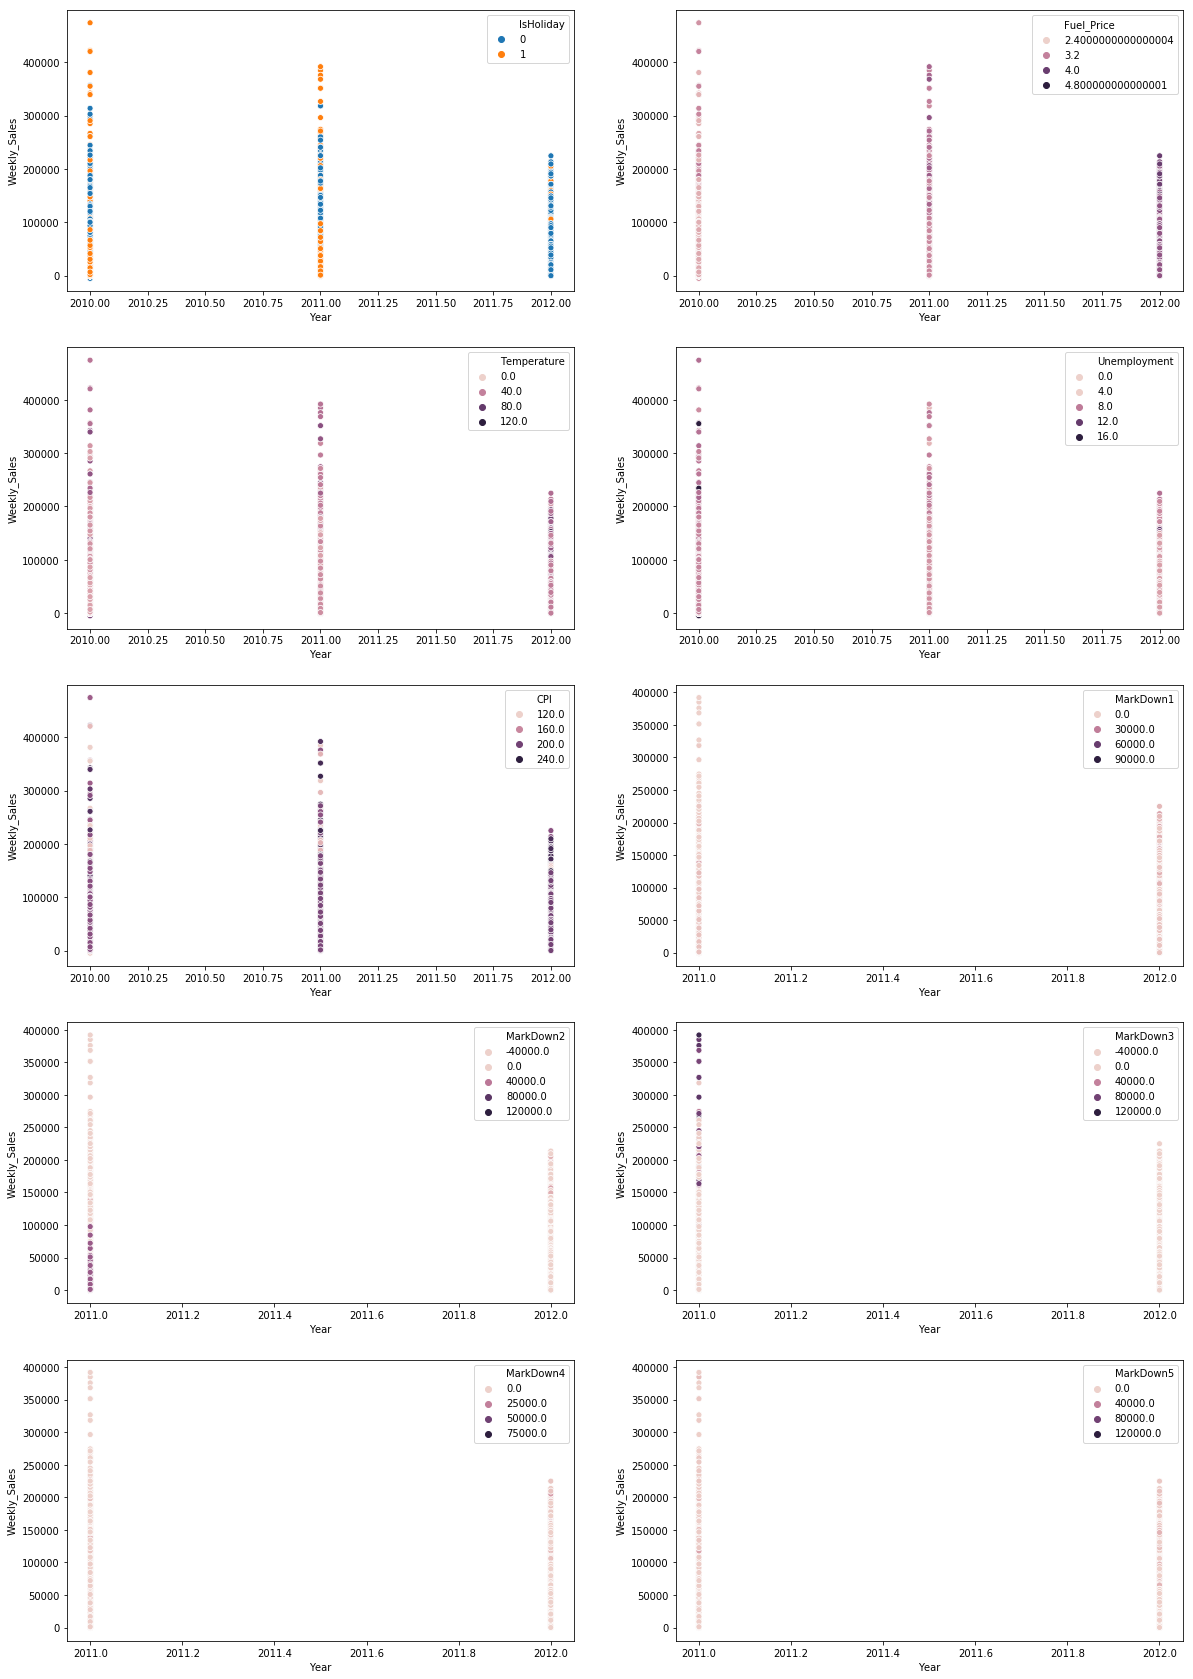

In [29]:
type_a_data = df.loc[df.Type=='A']
f, ax = plt.subplots(5,2, figsize=(20,30))
sns.scatterplot(x='Year', y="Weekly_Sales", hue='IsHoliday', data=type_a_data, ax=ax[0,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='Fuel_Price', data=type_a_data, ax=ax[0,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='Temperature', data=type_a_data, ax=ax[1,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='Unemployment', data=type_a_data, ax=ax[1,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='CPI', data=type_a_data, ax=ax[2,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown1', data=type_a_data, ax=ax[2,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown2', data=type_a_data, ax=ax[3,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown3', data=type_a_data, ax=ax[3,1])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown4', data=type_a_data, ax=ax[4,0])
sns.scatterplot(x='Year', y="Weekly_Sales", hue='MarkDown5', data=type_a_data, ax=ax[4,1])

**Insights**
At the time of Sales boost there was following factors which boosted their sales:

* There is holiday
* Fuel prices are average
* Temperature is moderate
* Unemployment is increasing(Strange)
* CPI is above average or at peak
* MarkDown1, MarkDown4 and MarkDown 5 are 0
* MarkDown3 is very high
* MarkDown2 started high but falls down

All our insights very similar to the one we extracted before. The same case it's MarkDown3 that's causing boost in sales.